In [1]:
import pandas as pd

In [2]:
from itertools import combinations

In [3]:
import numpy as np

In [4]:
from operator import itemgetter

In [5]:
with open('bigrams.csv', 'r', encoding='utf-8') as f:
    df = pd.read_csv(f)

In [6]:
df

,Unnamed: 0,frequency,likelihood ratio,ngram,pmi,raw frequency,t score,tag
0,0,2677.0,-0.000000e+00,", ,",-2.296131,1.081612e-03,-202.374264,", ,"
1,1,263.0,-0.000000e+00,", -",-2.104873,1.062622e-04,-53.542925,", -"
2,2,204.0,-0.000000e+00,", :",-2.540684,8.242391e-05,-68.824076,", :"
3,3,129.0,-0.000000e+00,", а",3.467534,5.212100e-05,10.331071,", ADV"
4,4,6248.0,-0.000000e+00,", а",3.435401,2.524434e-03,71.737750,", CONJ"
5,5,5.0,2.182411e-05,", а",2.515201,2.020194e-06,1.844926,", PART"
6,6,18.0,-0.000000e+00,", а",-1.249057,7.272698e-06,-5.841520,", S"
7,7,1.0,2.616517e+00,", абанокова",2.778235,4.040388e-07,0.854230,", S"
8,8,1.0,5.237751e+00,", абаронца",3.778235,4.040388e-07,0.927115,", S"
9,9,1.0,2.616517e+00,", абдулла",2.778235,4.040388e-07,0.854230,", S"


In [7]:
PUNCTUATION = ',.?!-:;'

In [8]:
first_word = []
second_word = []
first_tag = []
second_tag = []
pmi = []

for i in range(len(df)):
    if (df['tag'][i].split()[0] in 'SV' and df['tag'][i].split()[1] in 'SV') and not (len(df['ngram'][i].split()[0])==1 or len(df['ngram'][i].split()[1])==1):
        first_word.append(df['ngram'][i].split()[0])
        second_word.append(df['ngram'][i].split()[1])
        first_tag.append(df['tag'][i].split()[0])
        second_tag.append(df['tag'][i].split()[1])
        pmi.append('%.3f'%float(df['pmi'][i]))

In [9]:
sequences = pd.DataFrame({'first_word':first_word
                         , 'second_word':second_word
                         , 'first_tag':first_tag
                         , 'second_tag':second_tag
                         , 'pmi':pmi})

In [10]:
len(sequences)

182681

In [11]:
sequences.head()

,first_word,second_word,first_tag,second_tag,pmi
0,абалян,анна,S,S,16.432
1,аббас,обратился,S,V,16.285
2,аббатиса,хильдегарда,S,S,21.239
3,аббревиатура,применяется,S,V,12.217
4,аббревиатура,учк,S,S,18.917


In [12]:
import networkx as nx
G = nx.Graph()

In [13]:
for i in range(len(sequences)):
    first_node = '{0}, {1}'.format(sequences['first_word'][i], sequences['first_tag'][i])
    second_node = '{0}, {1}'.format(sequences['second_word'][i], sequences['second_tag'][i])
    if first_node in G.nodes() and not second_node in G.nodes():
        G.add_node(second_node)
        G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
    elif second_node in G.nodes() and not first_node in G.nodes():
        G.add_node(first_node)
        G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
    elif not first_node in G.nodes() and not second_node in G.nodes():
        G.add_node(first_node)
        G.add_node(second_node)
        G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
    else:
        pass

In [14]:
len(list(G.nodes()))

46106

In [15]:
import matplotlib.pyplot as plt

In [16]:
sub_graphs = list(nx.connected_component_subgraphs(G))

In [17]:
n = len(sub_graphs)

for i in range(n):
    print("Subgraph:", i, "consists of ",sub_graphs[i].nodes())

Subgraph: 0 consists of  ['костина, S', 'ростиславовна, S', 'ирина, S', 'владимировна, S', 'митрофанова, S', 'шестерякова, S', 'ярославна, S', 'михайловна, S', 'олеговна, S', 'абалян, S', 'дарья, S', 'москвитина, S', 'игоревна, S', 'леонидовна, S', 'николаевна, S', 'юрьевна, S', 'щурова, S', 'шентякова, S', 'анна, S', 'удивилась, V', 'сергеевна, S']
Subgraph: 1 consists of  ['пантелеев, S', 'шёнау, S', 'махмуд, S', 'богданчиков, S', 'аббас, S', 'радиомолчание, S', 'мекки, S', 'обратился, V']
Subgraph: 2 consists of  ['хильдегарда, S', 'аббатиса, S']
Subgraph: 3 consists of  ['применяется, V', 'учк, S', 'телисизация, S', 'аббревиатура, S', 'полюса, S']
Subgraph: 4 consists of  ['малиновсий, S', 'выходу, S', 'оказался, V', 'первопричиной, S', 'гафура, S', 'закария, S', 'фаненко, S', 'имад, S', 'азиз, S', 'абдель, S', 'провидцем, S', 'равновесием, S', 'реформах, S', 'сте, S', 'гафур, S', 'телесериала, S']
Subgraph: 5 consists of  ['абдраимов, S', 'разъяснил, V']
Subgraph: 6 consists of  [

Subgraph: 292 consists of  ['коэна, S', 'алана, S']
Subgraph: 293 consists of  ['зимбабве, S', 'заявляла, V', 'зеландия, S', 'бурунди, S', 'албания, S', 'шубин, S']
Subgraph: 294 consists of  ['отражают, V', 'цифика, S', 'рефлексию, S', 'фику, S', 'передачах, S', 'спе, S', 'выставляются, V', 'алгебре, S', 'сообщили, V']
Subgraph: 295 consists of  ['решетка, S', 'развертка, S', 'пакет, S', 'сервиса, S', 'ют, S', 'вычисляются, V', 'оценивания, S', 'использованием, S', 'карточки, S', 'уравнениях, S', 'модификаци, S', 'искажением, S', 'анализатора, S', 'парома, S', 'омм, S', 'атрибуции, S', 'име, S', 'гамильтона, S', 'итерации, S', 'искажение, S', 'раскладывают, V', 'усложнением, S', 'вгуэс, S', 'взаимодействий, S', 'применя, S', 'координация, S', 'шаве, S', 'карцевского, S', 'массивов, S', 'алгоритма, S', 'пае, S']
Subgraph: 296 consists of  ['алгоритмизации, S', 'доньев, S', 'затруднение, S', 'усвоения, S', 'виз, S', 'алгоритмы, S', 'получения, S', 'возмещений, S', 'датировки, S', 'пригл

Subgraph: 346 consists of  ['альфа, S', 'критерию, S', 'различают, V', 'циента, S', 'сформировался, V', 'возвращаются, V', 'варьируется, V', 'проектироваться, V', 'краскала, V', 'надежностью, S', 'комиссий, S', 'кронбаха, S', 'обвинила, V', 'предписывание, S', 'эффициент, S', 'ливиня, V', 'возрастала, V', 'альфу, S', 'пайщикам, S', 'сверхдоходность, S', 'приближенной, S', 'нулю, S', 'окрестности, S', 'нуля, S', 'продуктивности, S', 'экватив, S', 'статичности, S', 'вращения, S', 'месяцам, S', 'таланты, S']
Subgraph: 347 consists of  ['сови, S', 'экономистом, S', 'макалистер, S', 'альфред, S', 'альфредом, S']
Subgraph: 348 consists of  ['нобеля, S', 'перефразируя, V', 'альфреда, S', 'маршалла, S']
Subgraph: 349 consists of  ['мотиваций, S', 'альфрид, S', 'лэнгле, S', 'расширил, V']
Subgraph: 350 consists of  ['йенсена, S', 'альфы, S']
Subgraph: 351 consists of  ['светлана, S', 'дмитриевна, S', 'щербак, S', 'скульптор, S', 'ступенях, S', 'кузнецова, S', 'алябьева, S', 'помнилась, V']
Subg

Subgraph: 596 consists of  ['атипичность, S', 'произношение, S', 'модификаторов, S']
Subgraph: 597 consists of  ['атлас, S', 'дефинициям, S', 'терминов, S']
Subgraph: 598 consists of  ['поисков, S', 'атмосфера, S', 'единения, S', 'нравилась, V', 'догматики, S']
Subgraph: 599 consists of  ['заседаний, S', 'обогащение, S', 'проистекают, V', 'сотен, S', 'заготовка, S', 'протоколах, S', 'заготовке, S', 'возросли, V', 'воссоздать, V', 'атмосферу, S', 'подчеркивая, V', 'запасы, S', 'елей, S', 'заготовки, S', 'древесины, S', 'политбюро, S', 'дружелюбия, S', 'переполняли, V', 'расширило, V', 'обработкой, S', 'совещания, S', 'странами, S', 'секретность, S', 'газа, S', 'наличности, S', 'добыча, S', 'заготовку, S', 'географию, S', 'своевременность, S']
Subgraph: 600 consists of  ['дальтона, S', 'атомистика, S']
Subgraph: 601 consists of  ['регулируется, V', 'окружением, S', 'обращали, V', 'заложило, V', 'публицистика, S', 'воротничков, S', 'материалами, S', 'учительница, S', 'озабоченность, S', '

Subgraph: 846 consists of  ['синергии, S', 'благоприятствуют, V']
Subgraph: 847 consists of  ['выходи, V', 'благоразумие, S', 'одерживает, V']
Subgraph: 848 consists of  ['благорасположения, S', 'начальства, S']
Subgraph: 849 consists of  ['саула, S', 'копи, S', 'экспрессией, S', 'гнева, S', 'хабихт, S', 'агиса, S', 'испугавшись, V', 'гробница, S', 'подмене, S', 'похвалу, S', 'благосклонности, S', 'царя, S', 'обожествления, S']
Subgraph: 850 consists of  ['благословение, S', 'патриарха, S']
Subgraph: 851 consists of  ['областьноситель, S', 'избрание, S', 'расцениваются, V', 'формирований, S', 'интересах, S', 'меры, S', 'покупателей, S', 'мельтюхов, S', 'парадокс, S', 'маржинальность, S', 'рефлексивности, S', 'наказание, S', 'освобождению, S', 'труб, S', 'плечо, S', 'налагает, V', 'крестьян, S', 'созданию, S', 'подобия, S', 'тюрьмой, S', 'казателей, S', 'истерлина, S', 'пережила, V', 'увеличивать, V', 'отбывал, V', 'понесли, V', 'вводятся, V', 'интервалов, S', 'содействия, S', 'составы,

Subgraph: 1096 consists of  ['неудачником, S', 'бюджетник, S']
Subgraph: 1097 consists of  ['северо-востока, S', 'обследованием, S', 'выплачивается, V', 'контрактеров, S', 'компенсация, S', 'неуспеха, S', 'дефицитов, S', 'недофинансирование, S', 'муниципалитетов, S', 'раздуванию, S', 'бюджетов, S']
Subgraph: 1098 consists of  ['бюрократами, S', 'формулировке, S', 'уделяло, V', 'пожелания, S', 'получала, V', 'синтеза, S', 'углубления, S', 'разрешая, V', 'планирование, S', 'параметру, S', 'нажимом, S', 'сиблинг, S', 'коши, S', 'поймет, V', 'обла, S', 'версия, S', 'задачи, S', 'операцией, S', 'выполнением, S', 'федерация, S', 'пересмотрит, V', 'специфичностью, S', 'ссу, V', 'рядка, S']
Subgraph: 1099 consists of  ['компартия, S', 'бюрократия, S', 'ориентировалась, V']
Subgraph: 1100 consists of  ['бяше, S', 'успилъ, S', 'отецъ, S']
Subgraph: 1101 consists of  ['братие, S', 'бяшетъ, S']
Subgraph: 1102 consists of  ['бяшеть, V', 'притрепалъ, V']
Subgraph: 1103 consists of  ['вав, S', 'шие, 

Subgraph: 1346 consists of  ['вкладывались, V', 'выставке, S', 'опись, S']
Subgraph: 1347 consists of  ['вигов, S', 'слияния, S', 'микроволновке, S', 'достоинствах, S', 'дамми, S', 'взаимодействовал, V', 'пол, S', 'муниципалитете, S', 'включались, V', 'мойки, S', 'налогооблагаемость, S', 'мили, S', 'развитости, S', 'подъездом, S']
Subgraph: 1348 consists of  ['филиппин, S', 'боян, S', 'решалась, V', 'пел, V', 'включало, V', 'представляясь, V', 'оккупации, S', 'глаша, S', 'потеряли, V', 'интервалом, S', 'дней, S']
Subgraph: 1349 consists of  ['льгота, S', 'стоимость, S', 'обнулили, V', 'включаться, V', 'отпугивает, V', 'рекламодатели, S', 'забирают, V', 'абонемента, S']
Subgraph: 1350 consists of  ['партнеров, S', 'тяготеть, V', 'доменов, S', 'индивидуальности, S', 'чеснокова, S', 'перебору, S', 'включением, S', 'метабытие, S', 'самовоспитание, S', 'вырезается, V', 'распадается, V', 'голод, S', 'реживания, S', 'подызмерений, S', 'включени, S']
Subgraph: 1351 consists of  ['включили, V',

Subgraph: 1596 consists of  ['всё, S', 'кончилось, V']
Subgraph: 1597 consists of  ['вторжении, S', 'немцев, S']
Subgraph: 1598 consists of  ['втра, S', 'уезжает, V']
Subgraph: 1599 consists of  ['аркадиуш, S', 'вударский, S']
Subgraph: 1600 consists of  ['аллена, S', 'вуди, S']
Subgraph: 1601 consists of  ['вузу, S', 'пропорци, S', 'кейривал, S', 'выборках, S', 'гласс, S']
Subgraph: 1602 consists of  ['вун, S', 'дта, S']
Subgraph: 1603 consists of  ['вхождений, S', 'агитировать, V', 'продажа, S', 'лексемы, S', 'привнесением, S', 'элемента, S', 'скетч, S']
Subgraph: 1604 consists of  ['коннектором, S', 'алифициров, S', 'кв, S', 'вцик, S']
Subgraph: 1605 consists of  ['подарок, S', 'выбираете, V', 'апологетам, S']
Subgraph: 1606 consists of  ['выбо, S', 'рах, S']
Subgraph: 1607 consists of  ['выборга, S', 'эвакуируется, V']
Subgraph: 1608 consists of  ['автомобиля, S', 'приоритетов, S', 'путаница, S', 'десерта, S', 'костюма, S', 'учитывались, V', 'расстановкой, S', 'выборе, S', 'специфи

Subgraph: 1846 consists of  ['гнизи, S', 'игроки, S']
Subgraph: 1847 consists of  ['мультгерой, S', 'гномик, S']
Subgraph: 1848 consists of  ['боуэн, S', 'роджер, S', 'говард, S']
Subgraph: 1849 consists of  ['гово, S', 'рит, S']
Subgraph: 1850 consists of  ['говорах, S', 'отмечаются, V', 'паузой, S']
Subgraph: 1851 consists of  ['этнография, S', 'говорения, S', 'хаймс, S']
Subgraph: 1852 consists of  ['джорджо, S', 'ночи, S', 'час, S', 'говорим, V', 'агамбен, S']
Subgraph: 1853 consists of  ['бре, S', 'говорю, V']
Subgraph: 1854 consists of  ['внахлест, S', 'говоря, V']
Subgraph: 1855 consists of  ['реализовывался, V', 'привоз, S', 'говядины, S']
Subgraph: 1856 consists of  ['годе, S', 'усреднение, S']
Subgraph: 1857 consists of  ['устали, S', 'рейн, S', 'сопротивлению, S', 'утратило, V', 'произошли, V', 'дефициты, S', 'уходу, S', 'олигополия, S', 'закончилось, V', 'отставание, S', 'ипп, S', 'вызревал, V', 'решалось, V', 'революционность, S', 'наметилось, V', 'епархия, S', 'складывает

Subgraph: 2095 consists of  ['вычитались, V', 'свопов, S', 'дефолтных, S']
Subgraph: 2096 consists of  ['деформацией, S', 'профдеформацией, S']
Subgraph: 2097 consists of  ['искажениями, S', 'деформациями, S']
Subgraph: 2098 consists of  ['дешифровки, S', 'сигналов, S']
Subgraph: 2099 consists of  ['дешоков, S', 'лает, V']
Subgraph: 2100 consists of  ['дея, S', 'доброжела, V', 'тельности, S', 'роди, V', 'тель, S', 'телем, S']
Subgraph: 2101 consists of  ['ечменице, S', 'деяну, S']
Subgraph: 2102 consists of  ['неру, S', 'джавахарлала, S']
Subgraph: 2103 consists of  ['джавацци, S', 'алесина, S']
Subgraph: 2104 consists of  ['исломии, S', 'точикистон, S', 'нахзати, S', 'джавонони, S']
Subgraph: 2105 consists of  ['иллюстрирует, V', 'джадсона, S', 'синтагруса, S', 'джеймса, S', 'макферсона, S', 'фрагмент, S', 'кука, S']
Subgraph: 2106 consists of  ['жака, S', 'руссо, S', 'джакомо, S']
Subgraph: 2107 consists of  ['джалилом, S', 'мамедкулизаде, S']
Subgraph: 2108 consists of  ['джамаат, S

Subgraph: 2345 consists of  ['останках, S', 'екатеринбургом, S']
Subgraph: 2346 consists of  ['екатериной, S', 'александровной, S', 'лидией, S']
Subgraph: 2347 consists of  ['петровны, S', 'екатерины, S']
Subgraph: 2348 consists of  ['центрархива, S', 'еление, S']
Subgraph: 2349 consists of  ['имиджа, S', 'ения, S']
Subgraph: 2350 consists of  ['ент, S', 'рентабельности, S']
Subgraph: 2351 consists of  ['кукувестник, S', 'епархии, S']
Subgraph: 2352 consists of  ['святитель, S', 'тихон, S', 'лященко, S', 'епископ, S']
Subgraph: 2353 consists of  ['епископом, S', 'этьеном, S', 'парижа, S', 'тампье, S']
Subgraph: 2354 consists of  ['еремина, S', 'спровоцировал, V']
Subgraph: 2355 consists of  ['еретики, S', 'зовутся, V', 'гуситами, S']
Subgraph: 2356 consists of  ['ессора, S', 'лен, S', 'ессор, S']
Subgraph: 2357 consists of  ['ефрема, S', 'сирина, S', 'поучения, S']
Subgraph: 2358 consists of  ['шоколад, S', 'ешьте, V']
Subgraph: 2359 consists of  ['жаворонков, S']
Subgraph: 2360 consis

Subgraph: 2595 consists of  ['знакомых, S', 'климова, S']
Subgraph: 2596 consists of  ['знамени, S', 'развевались, V']
Subgraph: 2597 consists of  ['креста, S', 'софией, S', 'знамение, S']
Subgraph: 2598 consists of  ['знаменьем, S', 'небес, S', 'пренебрегая, V', 'прерывностью, S']
Subgraph: 2599 consists of  ['знач, S', 'ение, S', 'управл, S']
Subgraph: 2600 consists of  ['демосфен, S', 'значились, V']
Subgraph: 2601 consists of  ['значителе, S', 'разы, S']
Subgraph: 2602 consists of  ['немногие, S', 'догматику, S', 'знают, V', 'адм, S']
Subgraph: 2603 consists of  ['гипноза, S', 'зованием, S']
Subgraph: 2604 consists of  ['бард, S', 'зодерквиста, S']
Subgraph: 2605 consists of  ['купола, S', 'золочение, S']
Subgraph: 2606 consists of  ['золушке, S', 'шварца, S']
Subgraph: 2607 consists of  ['зом, S', 'блокируют, V']
Subgraph: 2608 consists of  ['зоран, S', 'миркович, S', 'переворотом, S', 'постарался, V', 'джинджич, S']
Subgraph: 2609 consists of  ['плательщику, S', 'туроператор, S',

Subgraph: 2845 consists of  ['смешивается, V', 'католицизм, S', 'одержало, V']
Subgraph: 2846 consists of  ['каются, V', 'команды, S', 'геймеров, S']
Subgraph: 2847 consists of  ['разности, S', 'квадратами, S']
Subgraph: 2848 consists of  ['квазислово, S', 'квазислова, S']
Subgraph: 2849 consists of  ['квалификациям, S', 'оспк, S']
Subgraph: 2850 consists of  ['квартире, S', 'барона, S', 'холод, S', 'лампа, S', 'мережковских, S']
Subgraph: 2851 consists of  ['уилеру, S', 'квинс, S', 'колледжа, S', 'митчел, S', 'маркусу, S', 'урсуле, S']
Subgraph: 2852 consists of  ['одухотворенности, S', 'квинтэссенцию, S']
Subgraph: 2853 consists of  ['выброса, S', 'квота, S']
Subgraph: 2854 consists of  ['шмидта, S', 'филлипса, S', 'квятковского, S', 'юлиана, S']
Subgraph: 2855 consists of  ['кедрову, S', 'формулировать, V', 'советоваться, V']
Subgraph: 2856 consists of  ['келли, S', 'самодеструктивности, S']
Subgraph: 2857 consists of  ['сталкивались, V', 'кельты, S']
Subgraph: 2858 consists of  ['к

Subgraph: 3095 consists of  ['лекалам, S', 'схемам, S']
Subgraph: 3096 consists of  ['лексеме, S', 'льду, S', 'едешь, V']
Subgraph: 3097 consists of  ['ступления, S', 'парторганов, S', 'лекторов, S']
Subgraph: 3098 consists of  ['лелеял, V', 'мечту, S']
Subgraph: 3099 consists of  ['сникет, S', 'лемони, S']
Subgraph: 3100 consists of  ['поко, S', 'лением, S', 'анонимности, S', 'технология, S']
Subgraph: 3101 consists of  ['санкт-петербургу, S', 'ленинграду, S']
Subgraph: 3102 consists of  ['леон, S', 'эпстейн, S']
Subgraph: 3103 consists of  ['леона, S', 'брюнсвика, S']
Subgraph: 3104 consists of  ['зенонович, S', 'эйлер, S', 'леонард, S']
Subgraph: 3105 consists of  ['леонида, S', 'леонова, S', 'леса, S']
Subgraph: 3106 consists of  ['леонть, S', 'ева, S']
Subgraph: 3107 consists of  ['фокусирование, S', 'леонтьевым, S', 'методе, S']
Subgraph: 3108 consists of  ['ресторан, S', 'лес, S', 'тотем, S', 'фомы, S']
Subgraph: 3109 consists of  ['лесей, S', 'украинкой, S']
Subgraph: 3110 cons

Subgraph: 3345 consists of  ['набирать, V', 'обороты, S']
Subgraph: 3346 consists of  ['набором, S', 'символов, S', 'четания, S', 'ху, S', 'хромосом, S', 'расположением, S', 'витаминов, S']
Subgraph: 3347 consists of  ['одев, V', 'набрать, V', 'очки, S']
Subgraph: 3348 consists of  ['варенья, S', 'наваривать, V']
Subgraph: 3349 consists of  ['наведение, S', 'мостов, S']
Subgraph: 3350 consists of  ['курсора, S', 'наведении, S']
Subgraph: 3351 consists of  ['навигации, S', 'шара, S', 'транспорты, S']
Subgraph: 3352 consists of  ['наводил, V', 'мосты, S']
Subgraph: 3353 consists of  ['навязывает, V', 'прочтение, S']
Subgraph: 3354 consists of  ['творцам, S', 'навязывают, V']
Subgraph: 3355 consists of  ['туловище, S', 'нагибает, V']
Subgraph: 3356 consists of  ['насыщенность, S', 'нагнетать, V']
Subgraph: 3357 consists of  ['награда, S', 'присуждалась, V', 'специалистам, S']
Subgraph: 3358 consists of  ['впечатлял, V', 'наградам, S']
Subgraph: 3359 consists of  ['награждает, V', 'отлични

Subgraph: 3595 consists of  ['основателя, S', 'оскорбление, S']
Subgraph: 3596 consists of  ['мышц, S', 'ослаблением, S']
Subgraph: 3597 consists of  ['осмотру, S', 'экспозиций, S']
Subgraph: 3598 consists of  ['реалиям, S', 'оснащения, S']
Subgraph: 3599 consists of  ['ванную, S', 'осно, S']
Subgraph: 3600 consists of  ['ливо, S', 'ситетам, S', 'особ, S']
Subgraph: 3601 consists of  ['особливий, S', 'етнос, S']
Subgraph: 3602 consists of  ['оставляя, V', 'массам, S', 'предложит, V']
Subgraph: 3603 consists of  ['останки, S', 'зарыли, V']
Subgraph: 3604 consists of  ['ханса, S', 'островок, S']
Subgraph: 3605 consists of  ['баллотировались, V', 'острову, S']
Subgraph: 3606 consists of  ['галы, S', 'страсти, S', 'остужать, V']
Subgraph: 3607 consists of  ['грамматиками, S', 'осуждаются, V']
Subgraph: 3608 consists of  ['осуществляя, V', 'расправу, S', 'селекцию, S']
Subgraph: 3609 consists of  ['любов, S', 'отака, S']
Subgraph: 3610 consists of  ['отбросят, V', 'шайку, S']
Subgraph: 3611

Subgraph: 3845 consists of  ['витийствовать, V', 'постыдись, V']
Subgraph: 3846 consists of  ['потерялся, V', 'волшебник, S']
Subgraph: 3847 consists of  ['потоцкий, S', 'вызывался, V']
Subgraph: 3848 consists of  ['потреблять, V', 'еду, S']
Subgraph: 3849 consists of  ['потребностям, S', 'доменах, S']
Subgraph: 3850 consists of  ['афинам, S', 'похвала, S']
Subgraph: 3851 consists of  ['гомофобии, S', 'почве, S']
Subgraph: 3852 consists of  ['самобытность, S', 'почвенничество, S']
Subgraph: 3853 consists of  ['почитателя, S', 'стихов, S']
Subgraph: 3854 consists of  ['почтительностью, S', 'сяо, S']
Subgraph: 3855 consists of  ['титана, S', 'пощадили, V']
Subgraph: 3856 consists of  ['поэмах, S', 'эда, S']
Subgraph: 3857 consists of  ['поют, V', 'святославу, S']
Subgraph: 3858 consists of  ['появлялась, V', 'подсказка, S']
Subgraph: 3859 consists of  ['выразителя, S', 'правах, S', 'вольноопределяющегося, S']
Subgraph: 3860 consists of  ['прави, V', 'тельству, S']
Subgraph: 3861 consists

Subgraph: 4094 consists of  ['самолет, S', 'приземлился, V']
Subgraph: 4095 consists of  ['кидает, V', 'сани, S']
Subgraph: 4096 consists of  ['бурге, S', 'санктпетер, S']
Subgraph: 4097 consists of  ['санкциониро, S', 'ванных, S']
Subgraph: 4098 consists of  ['сара, S', 'мэтер, S']
Subgraph: 4099 consists of  ['сахар, S', 'инфаркт, S']
Subgraph: 4100 consists of  ['сберечь, V', 'европу, S']
Subgraph: 4101 consists of  ['сборах, S', 'толкуются, V']
Subgraph: 4102 consists of  ['син, S', 'сбрасывать, V', 'виховувався, S']
Subgraph: 4103 consists of  ['сбыте, S', 'наркоти, S']
Subgraph: 4104 consists of  ['свальбарде, S', 'шпицбергене, S']
Subgraph: 4105 consists of  ['сведя, V', 'приезды, S']
Subgraph: 4106 consists of  ['кабуса, S', 'сверг, V', 'султана, S']
Subgraph: 4107 consists of  ['монархию, S', 'свергло, V']
Subgraph: 4108 consists of  ['сверстником, S', 'демосфену, S']
Subgraph: 4109 consists of  ['сверхсрочников, S', 'инструкторов, S']
Subgraph: 4110 consists of  ['луна, S', '

Subgraph: 4344 consists of  ['шейся, S', 'ухудшав, V']
Subgraph: 4345 consists of  ['участились, V', 'прогулы, S']
Subgraph: 4346 consists of  ['уюта, S', 'нартовабочавер, S']
Subgraph: 4347 consists of  ['искандер, S', 'фазиль, S']
Subgraph: 4348 consists of  ['яковлевна, S', 'фаина, S']
Subgraph: 4349 consists of  ['факультетах, S', 'бумагомерства, S']
Subgraph: 4350 consists of  ['печатей, S', 'фальсификатором, S']
Subgraph: 4351 consists of  ['фамилиям, S', 'грантозаявителей, S']
Subgraph: 4352 consists of  ['тазий, S', 'фан, S']
Subgraph: 4353 consists of  ['фарелли, S', 'фар, S', 'релли, S']
Subgraph: 4354 consists of  ['могерини, S', 'федерика, S']
Subgraph: 4355 consists of  ['фернандо, S', 'кортеса, S']
Subgraph: 4356 consists of  ['осадили, V', 'фиванцы, S']
Subgraph: 4357 consists of  ['милинкович, S', 'филип, S']
Subgraph: 4358 consists of  ['левтонова, S', 'филиппинам, S']
Subgraph: 4359 consists of  ['инициалы, S', 'филипповым, S']
Subgraph: 4360 consists of  ['филиппу, S

In [18]:
n

4466

In [67]:
time_other = []
time_one = []

for i in range(n):
    if 'время, S' in sub_graphs[i].nodes() and sub_graphs[i].degree['время, S'] == 179:
        print(i)
        for node in sub_graphs[i].nodes():
            if node == 'время, S':
                pass
            if nx.shortest_path_length(sub_graphs[i],source='время, S',target=node) == 1:
                time_one.append(node.split(',')[0])
            else:
                time_other.append(node.split(',')[0])

128


In [68]:
len(time_other) +  len(time_one)

1957

In [75]:
import json

with open('cat_time_one.json', 'w', encoding='utf-8') as f:
    json.dump(time_one, f)

In [76]:
with open('cat_time_other.json', 'w', encoding='utf-8') as ff:
    json.dump(time_other, ff)

In [19]:
def draw_graph(sample_graph):
    sample_dcent = nx.degree_centrality(sample_graph)
    sample_sizes = [x*4000 for x in sample_dcent.values()]
    sample_colors = [float(x) for x in sample_dcent.values()]
    plt.figure(figsize=(20,20))
    plt.axis('off')
    nx.draw_networkx(sample_graph
                     , with_labels=True
                     , node_size=sample_sizes
                     , node_color = sample_colors
                     , cmap = plt.cm.winter
                     , font_size=14
                     , alpha=0.9)

In [20]:
def find_substitution_pairs(subgraph):
    sg_degrees = sorted(nx.degree(subgraph),reverse=True,key=itemgetter(1))
    candidate_nodes = [i[0] for i in sg_degrees if i[1] >= 3]
    candidate_pairs = []
    for i in list(set(combinations(candidate_nodes,2))):
        if subgraph.has_edge(i[0], i[1])==False:
            path = nx.shortest_path_length(subgraph,source=i[0],target=i[1])
            if i[0].split()[1] != i[1].split()[1]:
                if path == 3:
                    candidate_pairs.append((i, path))
            elif i[0].split()[1] == i[1].split()[1]:
                if path <= 3:
                    candidate_pairs.append((i, path))
    return candidate_pairs

In [21]:
def candidate_lookup(graph, node_pair):
    first_word = node_pair[0][0].split()[0][:-1]
    first_tag = node_pair[0][0].split()[1]
    second_word = node_pair[0][1].split()[0][:-1]
    second_tag = node_pair[0][1].split()[1]
    
    first_node_children = dict(graph[node_pair[0][0]])
    second_node_children = dict(graph[node_pair[0][1]])
    
    first_substitutes = {}
    second_substitutes = {}
    
    if node_pair[1] == 2:
        #search for nodes between them
        for k, v in first_node_children.items():
            if k.split()[1] == second_tag and k in second_node_children.keys():
                first_substitutes.update({k:1})
        for k, v in second_node_children.items():
            if k.split()[1] == first_tag and k in first_node_children.keys():
                second_substitutes.update({k:1})
                
    elif node_pair[1] > 2:

        for child, pmi in second_node_children.items():
            if child.split()[1] == first_tag:
                grandchildren = dict(graph[child])
                rank = 0
                for grandchild, g_pmi in grandchildren.items():
                    if grandchild.split()[1] == second_tag and grandchild in first_node_children.keys():
                        rank += 1
                if rank > 0:
                    first_substitutes.update({child:rank})

        for child, pmi in first_node_children.items():
            if child.split()[1] == second_tag:
                grandchildren = dict(graph[child])
                rank = 0
                for grandchild, g_pmi in grandchildren.items():
                    if grandchild.split()[1] == first_tag and grandchild in second_node_children.keys():
                        rank += 1
                if rank > 0:
                    second_substitutes.update({child:rank})
    
    sub1 = {}
    sub2 = {}
    
    for key in first_substitutes.keys():
        if '{0} {1}'.format(key.split()[0][:-1], second_word) in df.ngram.unique():
            sub1.update({key:first_substitutes[key]})
            
    for key in second_substitutes.keys():
        if '{0} {1}'.format(first_word, key.split()[0][:-1]) in df.ngram.unique():
            sub2.update({key:second_substitutes[key]})
            
    if sub1 or sub2:                  
        return (sub1, sub2)
    else:
        return None

In [22]:
def print_candidates(graph):
    candidate_pairs = find_substitution_pairs(graph)
    for pair in candidate_pairs:
        substitutes = candidate_lookup(graph, pair)
        if substitutes:
            print('Pair: {}'.format(pair[0]))
            print('path length: {}'.format(pair[1]))
            print('first word substitutes:')
            print(substitutes[0])
            print('second word substitutes:')
            print(substitutes[1])
            print('*******')

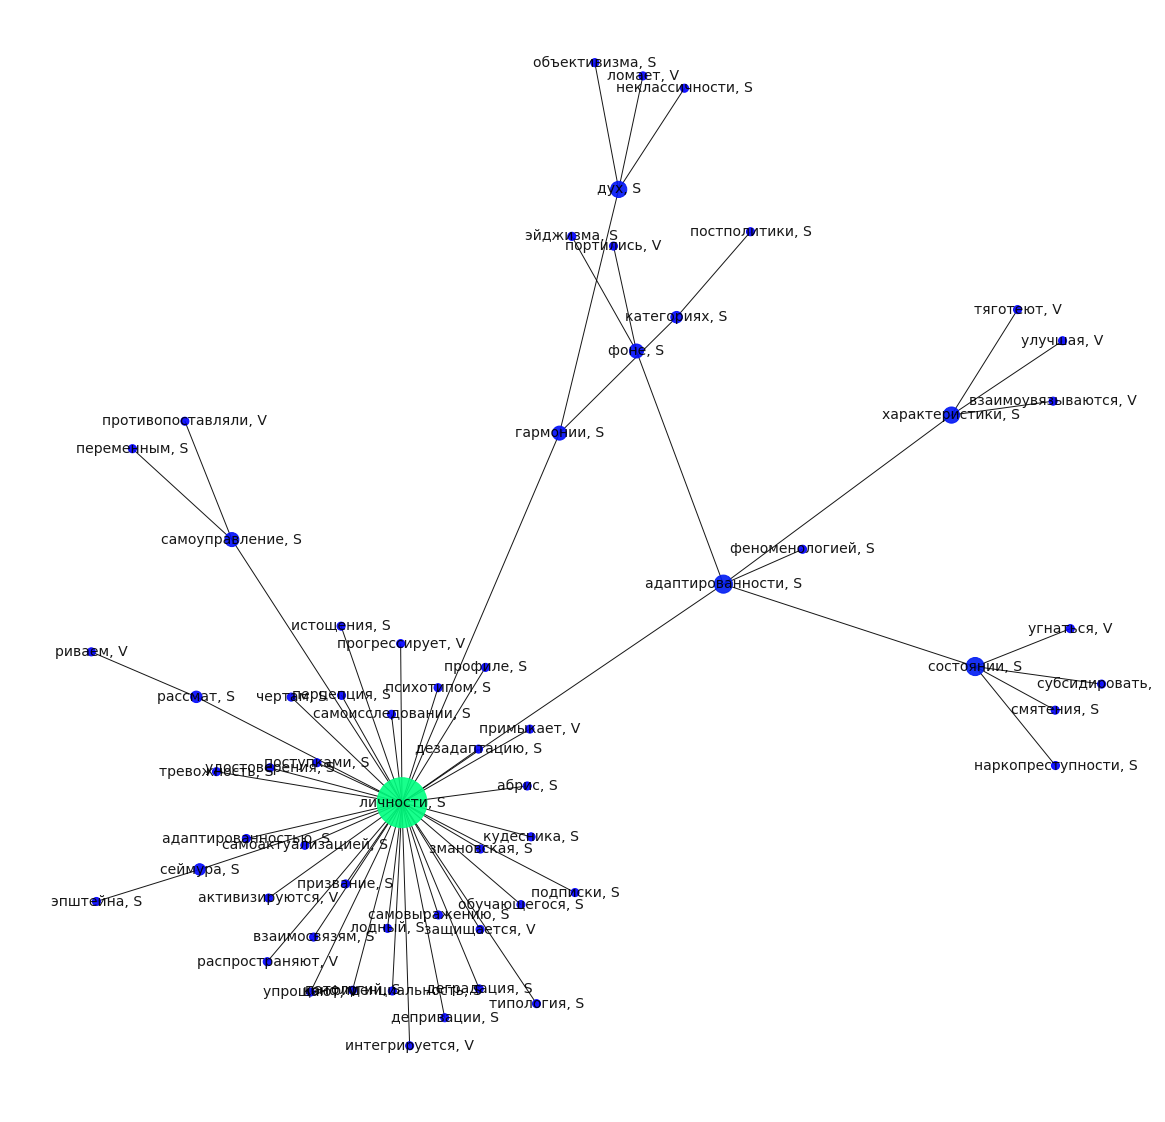

In [23]:
draw_graph(sub_graphs[25])

In [63]:
sub_graphs[128].number_of_nodes()

1957

In [24]:
print_candidates(sub_graphs[25])

Pair: ('гармонии, S', 'фоне, S')
path length: 3
first word substitutes:
{}
second word substitutes:
{'личности, S': 1}
*******
Pair: ('состоянии, S', 'самоуправление, S')
path length: 3
first word substitutes:
{'личности, S': 1}
second word substitutes:
{'адаптированности, S': 1}
*******
Pair: ('состоянии, S', 'характеристики, S')
path length: 2
first word substitutes:
{'адаптированности, S': 1}
second word substitutes:
{'адаптированности, S': 1}
*******
Pair: ('состоянии, S', 'гармонии, S')
path length: 3
first word substitutes:
{}
second word substitutes:
{'адаптированности, S': 1}
*******
Pair: ('личности, S', 'характеристики, S')
path length: 2
first word substitutes:
{'адаптированности, S': 1}
second word substitutes:
{}
*******
Pair: ('гармонии, S', 'самоуправление, S')
path length: 2
first word substitutes:
{'личности, S': 1}
second word substitutes:
{'личности, S': 1}
*******
Pair: ('характеристики, S', 'самоуправление, S')
path length: 3
first word substitutes:
{'личности, S':

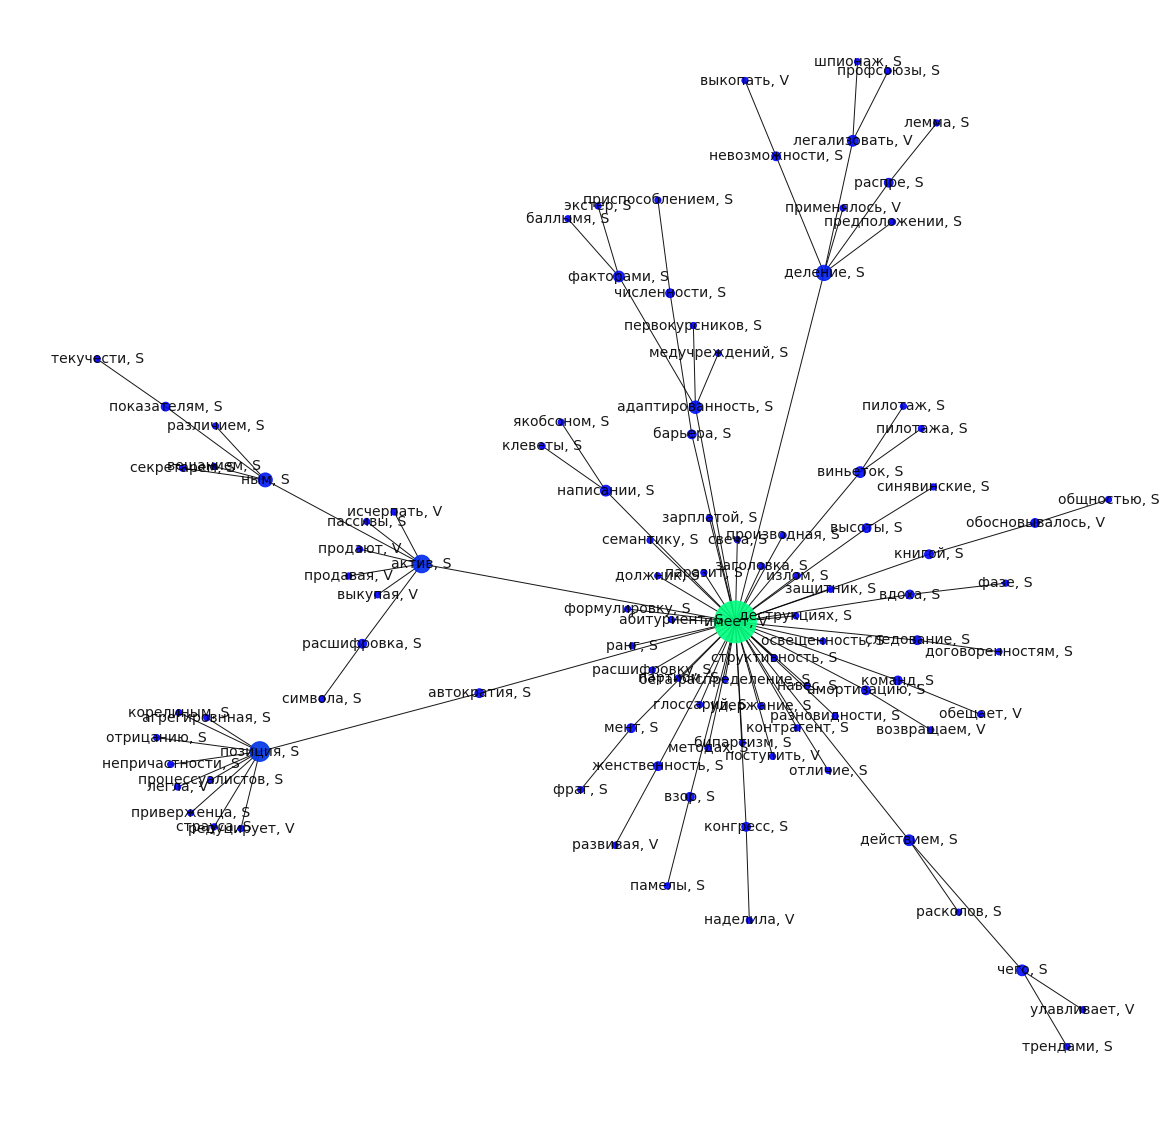

In [25]:
draw_graph(sub_graphs[91])

In [26]:
print_candidates(sub_graphs[91])

Pair: ('актив, S', 'легализовать, V')
path length: 3
first word substitutes:
{}
second word substitutes:
{'имеет, V': 1}
*******
Pair: ('адаптированность, S', 'легализовать, V')
path length: 3
first word substitutes:
{}
second word substitutes:
{'имеет, V': 1}
*******
Pair: ('легализовать, V', 'виньеток, S')
path length: 3
first word substitutes:
{}
second word substitutes:
{'деление, S': 1}
*******
Pair: ('написании, S', 'легализовать, V')
path length: 3
first word substitutes:
{}
second word substitutes:
{'имеет, V': 1}
*******
Pair: ('легализовать, V', 'действием, S')
path length: 3
first word substitutes:
{}
second word substitutes:
{'деление, S': 1}
*******


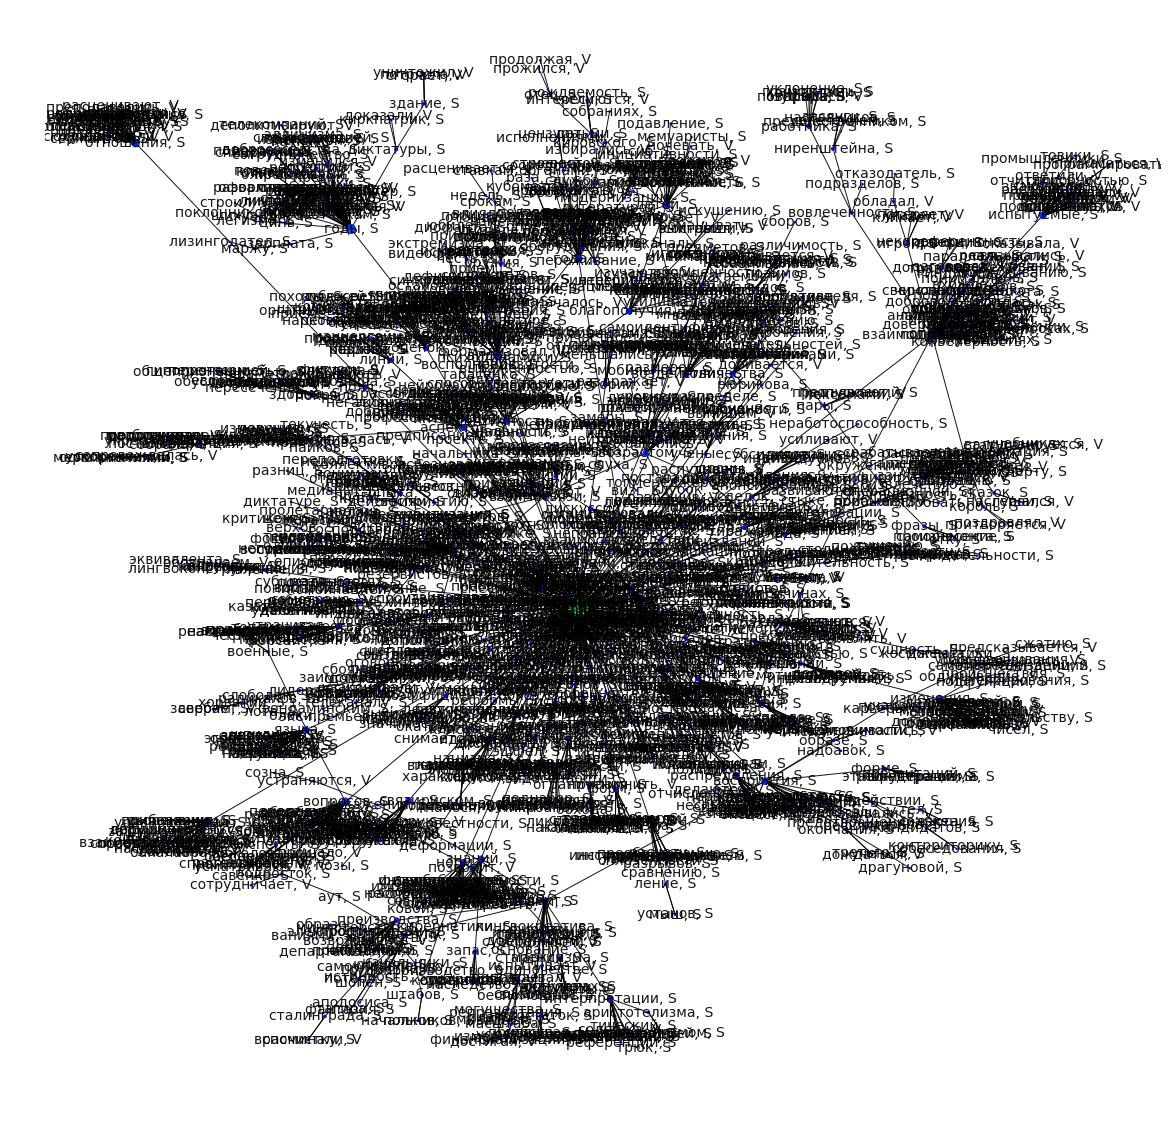

In [27]:
draw_graph(sub_graphs[339])

In [ ]:
print_candidates(sub_graphs[339])

Pair: ('кризиса, S', 'признаков, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('категорий, S', 'участникам, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('договора, S', 'взглядов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('оценок, S', 'взглядов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('возрастом, S', 'материала, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'взаимосвязи, S': 1}
*******
Pair: ('отношения, S', 'вовлеченность, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('рас, S', 'ума, S')
path length: 3
first word substitutes:
{'закрытия, S': 1}
second word substitutes:
{}
*******
Pair: ('инвалидов, S', 'глаголов, S')
path length: 3
first wo

Pair: ('сделок, S', 'ликвидации, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('взаимодействия, S', 'взаимосвязи, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('взглядов, S', 'масштабов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('благополучия, S', 'оценок, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('ума, S', 'способов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('причинах, S', 'участникам, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('игрока, S', 'друзьями, S')
path length: 3
first word substitutes:
{'детей, S': 1}
second word substitutes:
{}
*******
Pair: ('возрастом, S', 'понятий, S')
path length: 3
first word substitutes:
{'анали

Pair: ('аспект, S', 'знаков, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'восприятия, S': 1}
*******
Pair: ('материала, S', 'знаков, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'анализ, S': 1}
*******
Pair: ('противоречий, S', 'строфы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('понятий, S', 'состояния, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('дискуссии, S', 'контактов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('решений, S', 'форме, S')
path length: 3
first word substitutes:
{'восприятия, S': 1}
second word substitutes:
{}
*******
Pair: ('степени, S', 'окончания, S')
path length: 3
first word substitutes:
{'восприятия, S': 1}
second word substitutes:
{}
*******
Pair: ('наличия, S', 'употребления, S')
path length: 2
first w

Pair: ('сделок, S', 'цен, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('количества, S', 'ума, S')
path length: 3
first word substitutes:
{'закрытия, S': 1}
second word substitutes:
{}
*******
Pair: ('коррупции, S', 'способов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('факторов, S', 'признаков, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('понятий, S', 'литературы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('честь, S', 'публикаций, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('возраста, S', 'потребления, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('возрастом, S', 'практики, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second

Pair: ('ограничения, S', 'допустимости, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('отношения, S', 'признания, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('выступлений, S', 'отчетности, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('аспектов, S', 'вовлеченность, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('взглядов, S', 'литературы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('восприятия, S', 'допустимости, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('цен, S', 'честь, S')
path length: 3
first word substitutes:
{'понятия, S': 1}
second word substitutes:
{}
*******
Pair: ('показателей, S', 'периодом, S')
path length: 2
first word sub

Pair: ('факторов, S', 'постановки, S')
path length: 3
first word substitutes:
{'допустимости, S': 1}
second word substitutes:
{}
*******
Pair: ('потребления, S', 'материалов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('видов, S', 'периодом, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('ограничения, S', 'употребления, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('количества, S', 'выступлений, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('возраста, S', 'форм, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('решений, S', 'эксперты, S')
path length: 3
first word substitutes:
{'вопросов, S': 1}
second word substitutes:
{}
*******
Pair: ('норм, S', 'методом, S')
path length: 2
first word substitutes:
{'анали

Pair: ('цен, S', 'периодом, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('регулирования, S', 'выступлений, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('оценок, S', 'итогов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('обстоятельств, S', 'наличия, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('строфы, S', 'классификация, S')
path length: 3
first word substitutes:
{'занятости, S': 1}
second word substitutes:
{}
*******
Pair: ('последствий, S', 'сравнения, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('эффективности, S', 'залогодатель, S')
path length: 3
first word substitutes:
{'договора, S': 1}
second word substitutes:
{}
*******
Pair: ('литературы, S', 'допустимости, S')
path length: 2
first word subs

Pair: ('причины, S', 'прибыли, S')
path length: 3
first word substitutes:
{'вклада, S': 1}
second word substitutes:
{}
*******
Pair: ('программ, S', 'залогодатель, S')
path length: 3
first word substitutes:
{'договора, S': 1}
second word substitutes:
{}
*******
Pair: ('знаков, S', 'строфы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('степени, S', 'доверия, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('литературы, S', 'употребления, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('взаимосвязи, S', 'здоровья, S')
path length: 3
first word substitutes:
{'аспектов, S': 1}
second word substitutes:
{}
*******
Pair: ('материала, S', 'программ, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'анализ, S': 1}
*******
Pair: ('показателей, S', 'конституционности, S')
path length: 3
first wor

Pair: ('стратегий, S', 'факторов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('ление, S', 'способов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'показателей, S': 1}
*******
Pair: ('показателей, S', 'сдвигов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('результатов, S', 'позиций, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('изменения, S', 'точности, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('интеграции, S', 'ограничения, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('связей, S', 'корреляций, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('сделок, S', 'залогодатель, S')
path length: 3
first word subst

Pair: ('залогодатель, S', 'материалов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('доверия, S', 'дифференциации, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('причины, S', 'особенностей, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('изменения, S', 'инвалидов, S')
path length: 3
first word substitutes:
{'воздействия, S': 1}
second word substitutes:
{}
*******
Pair: ('связи, S', 'явление, S')
path length: 3
first word substitutes:
{'знаков, S': 1}
second word substitutes:
{'анализ, S': 1}
*******
Pair: ('знаний, S', 'обстоятельств, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('самоидентификации, S', 'информативности, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('вопросов, S', 'признания, S')
path leng

Pair: ('интеграции, S', 'директивы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('бедности, S', 'постановлений, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('цен, S', 'конституционности, S')
path length: 3
first word substitutes:
{'вопросов, S': 1}
second word substitutes:
{}
*******
Pair: ('факторов, S', 'образов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('стратегий, S', 'материалов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('восприятия, S', 'различия, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('различия, S', 'опыта, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('игрок, S', 'выступлений, S')
path length: 3
first word substitutes:
{'анал

Pair: ('периодом, S', 'заключении, S')
path length: 3
first word substitutes:
{}
second word substitutes:
{'анализ, S': 1}
*******
Pair: ('связей, S', 'надежности, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('потоков, S', 'взаимосвязей, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('знаков, S', 'морфологии, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('языка, S', 'морфологии, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('аспектов, S', 'литературы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('благополучия, S', 'понятий, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('материалов, S', 'надежности, S')
path length: 2
first word subst

Pair: ('связей, S', 'дискуссии, S')
path length: 3
first word substitutes:
{'аспектов, S': 1}
second word substitutes:
{}
*******
Pair: ('практики, S', 'масштабов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('оценок, S', 'лидер, S')
path length: 3
first word substitutes:
{'интервью, S': 1}
second word substitutes:
{}
*******
Pair: ('штабов, S', 'министерство, S')
path length: 3
first word substitutes:
{'ведомств, S': 1}
second word substitutes:
{}
*******
Pair: ('методом, S', 'итогов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('договора, S', 'постановлений, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('аспектов, S', 'допустимости, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('корреляций, S', 'пирсона, S')
path length: 2
first word substitutes:
{'анализ, S

Pair: ('взглядов, S', 'классификация, S')
path length: 3
first word substitutes:
{'занятости, S': 1}
second word substitutes:
{}
*******
Pair: ('вовлеченность, S', 'масштабов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('прибыли, S', 'пирсона, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('коррупции, S', 'тел, S')
path length: 3
first word substitutes:
{'взаимодействии, S': 1}
second word substitutes:
{}
*******
Pair: ('идентичности, S', 'форм, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('отношения, S', 'сдвигов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('идентичности, S', 'здоровья, S')
path length: 2
first word substitutes:
{'аспектов, S': 1}
second word substitutes:
{}
*******
Pair: ('факторов, S', 'последствий, S')
path length: 2
first word substitut

Pair: ('коэффициента, S', 'пирсона, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('договора, S', 'глаголов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('возраста, S', 'мобильность, S')
path length: 3
first word substitutes:
{'возрастом, S': 1}
second word substitutes:
{}
*******
Pair: ('обстоятельств, S', 'информативности, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('сделок, S', 'честь, S')
path length: 3
first word substitutes:
{'понятия, S': 1}
second word substitutes:
{}
*******
Pair: ('испытуемые, S', 'знаний, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('возраста, S', 'нарушений, S')
path length: 3
first word substitutes:
{'видов, S': 1}
second word substitutes:
{}
*******
Pair: ('цен, S', 'ликвидации, S')
path length: 2
first word substitutes:
{'анали

Pair: ('аспектов, S', 'различия, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('стратегий, S', 'постановки, S')
path length: 3
first word substitutes:
{'допустимости, S': 1}
second word substitutes:
{}
*******
Pair: ('форм, S', 'бюрократии, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('воздействия, S', 'корреляций, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('мнений, S', 'переводов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('коррупции, S', 'директивы, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('норм, S', 'показателей, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('восприятия, S', 'материала, S')
path length: 2
first word substitutes:
{'анал

Pair: ('потоков, S', 'участникам, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('признания, S', 'участникам, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('явление, S', 'постановлений, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('заключении, S', 'масштабов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'договора, S': 1}
*******
Pair: ('бюрократии, S', 'пирсона, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('восприятия, S', 'ума, S')
path length: 3
first word substitutes:
{'закрытия, S': 1}
second word substitutes:
{}
*******
Pair: ('восприятия, S', 'масштабов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('языка, S', 'методом, S')
path length: 2
fir

Pair: ('коррупции, S', 'противоречий, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('рас, S', 'героев, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('изменения, S', 'воздействия, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('потоков, S', 'честь, S')
path length: 3
first word substitutes:
{'понятия, S': 1}
second word substitutes:
{}
*******
Pair: ('здоровья, S', 'игрока, S')
path length: 3
first word substitutes:
{'благополучия, S': 1}
second word substitutes:
{}
*******
Pair: ('потребления, S', 'причины, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('вреда, S', 'мошенничества, S')
path length: 2
first word substitutes:
{'видов, S': 1}
second word substitutes:
{}
*******
Pair: ('идентичности, S', 'публикаций, S')
path length: 3
first word substitutes:
{

Pair: ('категорий, S', 'признаков, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('анализ, S', 'испытуемые, S')
path length: 2
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{'взаимодействия, S': 1}
*******
Pair: ('игрок, S', 'образов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('взглядов, S', 'материала, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('обстоятельств, S', 'признаков, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('понятия, S', 'самоидентификации, S')
path length: 3
first word substitutes:
{'динамики, S': 1}
second word substitutes:
{}
*******
Pair: ('ограничения, S', 'кризиса, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('знаний, S', 'практики, S')
path length: 2


Pair: ('коэффициента, S', 'особенностей, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('литературы, S', 'инвалидов, S')
path length: 3
first word substitutes:
{'воздействия, S': 1}
second word substitutes:
{}
*******
Pair: ('обстоятельств, S', 'дискуссии, S')
path length: 3
first word substitutes:
{'аспектов, S': 1}
second word substitutes:
{}
*******
Pair: ('оценок, S', 'пирсона, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('ума, S', 'употребления, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('вклада, S', 'лидер, S')
path length: 3
first word substitutes:
{'интервью, S': 1}
second word substitutes:
{}
*******
Pair: ('точности, S', 'честь, S')
path length: 3
first word substitutes:
{'понятия, S': 1}
second word substitutes:
{}
*******
Pair: ('сделок, S', 'реформы, S')
path length: 2
first word substitutes:
{'анализ,

Pair: ('здоровья, S', 'состояния, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('изменения, S', 'сделок, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('видов, S', 'знаков, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('ограничения, S', 'явление, S')
path length: 3
first word substitutes:
{'знаков, S': 1}
second word substitutes:
{}
*******
Pair: ('видов, S', 'итогов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('оценок, S', 'взаимосвязей, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('ликвидации, S', 'дифференциации, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('карьеры, S', 'мнений, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
secon

Pair: ('взглядов, S', 'причины, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('материалов, S', 'классификация, S')
path length: 3
first word substitutes:
{'занятости, S': 1}
second word substitutes:
{}
*******
Pair: ('договора, S', 'распределения, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('результатов, S', 'практики, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('причин, S', 'программ, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('взглядов, S', 'коррупции, S')
path length: 3
first word substitutes:
{'восприятия, S': 1}
second word substitutes:
{}
*******
Pair: ('явление, S', 'потоков, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('изменения, S', 'факторов, S')
path length: 2
first word substitutes:
{'

Pair: ('показателей, S', 'дифференциации, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('коэффициента, S', 'программ, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('различия, S', 'взглядов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('качества, S', 'участникам, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('распределения, S', 'информативности, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('отношения, S', 'директивы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('признаков, S', 'героев, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('отношения, S', 'языка, S')
path length: 2
fir

Pair: ('потребления, S', 'связей, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('программ, S', 'корреляций, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('обстоятельств, S', 'особенностей, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('доминирование, S', 'способов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'бюрократии, S': 1}
*******
Pair: ('количества, S', 'реформы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('наличия, S', 'лидер, S')
path length: 3
first word substitutes:
{'интервью, S': 1}
second word substitutes:
{}
*******
Pair: ('испытуемые, S', 'особенностей, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('линии, S', 'особенностей, S')
path length: 3
firs

Pair: ('стратегий, S', 'постановлений, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('аспект, S', 'кандидатов, S')
path length: 3
first word substitutes:
{'взаимодействии, S': 1}
second word substitutes:
{'восприятия, S': 1}
*******
Pair: ('понятий, S', 'интеграции, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('позиций, S', 'причины, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('методом, S', 'категорий, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('интеграции, S', 'строфы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('договора, S', 'факторов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('итогов, S', 'реформы, S')
path length: 2
first word substi

Pair: ('видов, S', 'аспектов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('знаков, S', 'противоречий, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('признаков, S', 'вовлеченность, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('механизмов, S', 'компонентов, S')
path length: 3
first word substitutes:
{'взаимосвязи, S': 1}
second word substitutes:
{}
*******
Pair: ('опыта, S', 'строфы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('вопросов, S', 'точности, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('инвалидов, S', 'причины, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('восприятия, S', 'публикаций, S')
path length: 2
first word substitutes:

Pair: ('вклада, S', 'контактов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('риска, S', 'самоидентификации, S')
path length: 3
first word substitutes:
{'динамики, S': 1}
second word substitutes:
{}
*******
Pair: ('запас, S', 'противоречий, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'знаний, S': 1}
*******
Pair: ('воздействия, S', 'различия, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('испытуемые, S', 'итогов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('доверия, S', 'взаимосвязей, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('постановки, S', 'механизмов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('изменения, S', 'игрок, S')
path length: 3
first word subs

Pair: ('конституционности, S', 'образов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('воздействия, S', 'последствий, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('результатов, S', 'глаголов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('итогов, S', 'клиентов, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('эффективности, S', 'морфологии, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('понятия, S', 'здоровья, S')
path length: 3
first word substitutes:
{'аспектов, S': 1}
second word substitutes:
{}
*******
Pair: ('вклада, S', 'директивы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('аспект, S', 'постановлений, S')
path length: 3
firs

Pair: ('понятий, S', 'карьеры, S')
path length: 3
first word substitutes:
{'восприятия, S': 1}
second word substitutes:
{}
*******
Pair: ('аспект, S', 'признаков, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'восприятия, S': 1}
*******
Pair: ('норм, S', 'классификация, S')
path length: 3
first word substitutes:
{'занятости, S': 1}
second word substitutes:
{}
*******
Pair: ('вовлеченность, S', 'корреляций, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('линии, S', 'способов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('взглядов, S', 'участникам, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('бюрократии, S', 'глаголов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('коэффициента, S', 'продуктов, S')
path length: 2
f

Pair: ('аспектов, S', 'позиций, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('показателей, S', 'понятий, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('восприятии, S', 'постановлений, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'воздействия, S': 1}
*******
Pair: ('показателей, S', 'сделок, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('коррупции, S', 'корреляций, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('материалов, S', 'сдвигов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('воздействия, S', 'продуктов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('запас, S', 'материалов, S')
path length: 3
first word

Pair: ('механизмов, S', 'сравнения, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('литературы, S', 'способов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('противоречий, S', 'участникам, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('анализ, S', 'конституционности, S')
path length: 2
first word substitutes:
{'вопросов, S': 1}
second word substitutes:
{'вопросов, S': 1}
*******
Pair: ('вклада, S', 'реформы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('доверия, S', 'причин, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('результатов, S', 'мнений, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('точности, S', 'контактов, S')
path length: 2
first

Pair: ('честь, S', 'переводов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('языка, S', 'связи, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('показателей, S', 'бедности, S')
path length: 3
first word substitutes:
{'аспектов, S': 1}
second word substitutes:
{}
*******
Pair: ('взаимодействия, S', 'бюрократии, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('дискуссии, S', 'постановлений, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('возрастом, S', 'ликвидации, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'взаимосвязи, S': 1}
*******
Pair: ('самоидентификации, S', 'мнений, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('возраста, S', 'коэффициента, S')
path length: 3
f

Pair: ('выступлений, S', 'переводов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('инвалидов, S', 'противоречий, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('аспект, S', 'корреляций, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'восприятия, S': 1}
*******
Pair: ('языка, S', 'надежности, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('явление, S', 'образов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('изменения, S', 'ума, S')
path length: 3
first word substitutes:
{'закрытия, S': 1}
second word substitutes:
{}
*******
Pair: ('результатов, S', 'явление, S')
path length: 3
first word substitutes:
{'знаков, S': 1}
second word substitutes:
{}
*******
Pair: ('испытуемые, S', 'сдвигов, S')
path length: 3
first word substitut

Pair: ('продуктов, S', 'мнений, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('сдвигов, S', 'особенностей, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('благополучия, S', 'снабжение, S')
path length: 2
first word substitutes:
{}
second word substitutes:
{'детей, S': 1}
*******
Pair: ('утверждений, S', 'классификация, S')
path length: 3
first word substitutes:
{'занятости, S': 1}
second word substitutes:
{}
*******
Pair: ('динамики, S', 'инвалидов, S')
path length: 3
first word substitutes:
{'воздействия, S': 1}
second word substitutes:
{}
*******
Pair: ('компонентов, S', 'регулирования, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('признания, S', 'допустимости, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('здоровья, S', 'публикаций, S')
path length: 3
first w

Pair: ('взаимосвязи, S', 'мнений, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('глаголов, S', 'масштабов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('здоровья, S', 'масштабов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('продуктов, S', 'взаимосвязей, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('занятости, S', 'переводов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('благополучия, S', 'ограничения, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('норм, S', 'масштабов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('договора, S', 'стратегий, S')
path length: 2
first word substitutes:
{'анал

Pair: ('восприятия, S', 'факторов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('глаголов, S', 'сдвигов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('коэффициента, S', 'надежности, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('эффективности, S', 'потоков, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('идентичности, S', 'решений, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('идентичности, S', 'практики, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('стратегий, S', 'причин, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('опыта, S', 'сдвигов, S')
path length: 2
first word substitutes:
{'анализ

Pair: ('категорий, S', 'морфологии, S')
path length: 3
first word substitutes:
{'взаимодействия, S': 1}
second word substitutes:
{}
*******
Pair: ('риска, S', 'реформы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('причин, S', 'регулирования, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('связи, S', 'эффективности, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'анализ, S': 1}
*******
Pair: ('взаимодействия, S', 'регулирования, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('бедности, S', 'интервью, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('занятости, S', 'коэффициента, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('материала, S', 'вовлеченность, S')
path length:

Pair: ('взаимодействия, S', 'директивы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('запас, S', 'надежности, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'знаний, S': 1}
*******
Pair: ('итогов, S', 'продуктов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('механизмов, S', 'допустимости, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('степени, S', 'судьбы, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('возраста, S', 'здание, S')
path length: 3
first word substitutes:
{'диктатуры, S': 1}
second word substitutes:
{'годы, S': 1}
*******
Pair: ('отношения, S', 'причин, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('ление, S', 'сравнения, S')
path length: 3
first word su

Pair: ('восприятия, S', 'линии, S')
path length: 3
first word substitutes:
{'аспектов, S': 1}
second word substitutes:
{}
*******
Pair: ('признаков, S', 'дифференциации, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('материала, S', 'точности, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'анализ, S': 1}
*******
Pair: ('коррупции, S', 'выступлений, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('вклада, S', 'потребления, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('степени, S', 'состояния, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('понятия, S', 'признаков, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('заключении, S', 'употребления, S')
path length: 3
first word 

Pair: ('методом, S', 'потребления, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('механизмов, S', 'переводов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('связи, S', 'масштабов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{'анализ, S': 1}
*******
Pair: ('воздействия, S', 'стратегий, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('строфы, S', 'масштабов, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('конституционности, S', 'переводов, S')
path length: 3
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('изменения, S', 'пирсона, S')
path length: 2
first word substitutes:
{'анализ, S': 1}
second word substitutes:
{}
*******
Pair: ('противоречий, S', 'контактов, S')
path length: 2
first word

In [ ]:
#check how often candidate with most rank is also first by pmi
#check how often this candidate is in the first half
def compare_to_pmi(graph):
    all_substitutes = 0
    first_rank = 0
    in_first_half = 0
    
    candidate_pairs = find_substitution_pairs(graph)
    for pair in candidate_pairs:
        substitutes = candidate_lookup(graph, pair)
        if substitutes:
            paired = pair[0]
            first_word = paired[0].split()[0][:-1]
            second_word = paired[1].split()[0][:-1]
            path_length = pair[1]
            first_substitutes = substitutes[0]
            second_substitutes = substitutes[1]
            if first_substitutes:
                all_substitutes += len(first_substitutes.items())
                ranked_first = sorted(first_substitutes, reverse=True, key=itemgetter(1))[0]
                ranked_first_pmi = float(graph[ranked_first][paired[1]]['weight'])
                data_piece = sequences.loc[sequences['second_word'] == second_word]
                data_piece = data_piece.sort_values(by='pmi', ascending=False)
                first_by_pmi = float(data_piece.iloc[0]['pmi'])
                if ranked_first_pmi == first_by_pmi:
                    first_rank += 1
                if str(ranked_first_pmi) in data_piece.head(int(len(data_piece)/2))['pmi'].unique():
                    in_first_half += 1
            if second_substitutes:
                all_substitutes += len(second_substitutes.items())
                ranked_first = sorted(second_substitutes, reverse=True, key=itemgetter(1))[0]
                ranked_first_pmi = float(graph[ranked_first][paired[0]]['weight'])
                data_piece = sequences.loc[sequences['first_word'] == first_word]
                data_piece = data_piece.sort_values(by='pmi', ascending=False)
                first_by_pmi = float(data_piece.iloc[0]['pmi'])
                if ranked_first_pmi == first_by_pmi:
                    first_rank += 1
                if str(ranked_first_pmi) in data_piece.head(int(len(data_piece)/2))['pmi'].unique():
                    in_first_half += 1
                    
    return (all_substitutes, first_rank, in_first_half)
                   

In [ ]:
compare_to_pmi(sub_graphs[91])

In [ ]:
little_df = sequences.loc[sequences['first_word'] == 'анализ']

In [ ]:
little_df = little_df.sort_values(by='pmi', ascending=False)

In [ ]:
little_df.iloc[0]

In [ ]:
'4.798' in little_df.head(int(len(little_df)/2))['pmi'].unique()

## Average clustering coefficient

In [25]:
all_clustering = []
for subgraph in sub_graphs:
    all_clustering.append(nx.average_clustering(subgraph))

In [26]:
set(all_clustering)

{0.0}

In [27]:
all_transitivity = []
for subgraph in sub_graphs:
    all_transitivity.append(nx.transitivity(subgraph))

In [28]:
set(all_transitivity)

{0}

In [29]:
all_triangles = []
for subgraph in sub_graphs:
    all_triangles.append(sum(nx.triangles(subgraph).values())/3)

In [30]:
set(all_triangles)

{0.0}

In [31]:
all_assortativity = []
for subgraph in sub_graphs:
    all_assortativity.append(nx.degree_assortativity_coefficient(subgraph))

C:\Users\vasel\Anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [32]:
assortativities = [i for i in list(set(all_assortativity)) if str(i) != 'nan']

In [33]:
np.mean(assortativities)

-0.5366050610265477

## Node degree distribution

In [34]:
degrees = sorted(nx.degree(G),reverse=True,key=itemgetter(1))

In [35]:
degrees

[('будет, V', 329),
 ('был, V', 311),
 ('было, V', 301),
 ('были, V', 245),
 ('может, V', 237),
 ('была, V', 218),
 ('анализ, S', 192),
 ('время, S', 179),
 ('возможность, S', 176),
 ('автор, S', 153),
 ('авторы, S', 149),
 ('могут, V', 143),
 ('спбгу, S', 135),
 ('анализа, S', 132),
 ('быть, V', 131),
 ('возможности, S', 122),
 ('является, V', 115),
 ('будут, V', 113),
 ('власти, S', 112),
 ('времени, S', 107),
 ('вестник, S', 89),
 ('внимание, S', 86),
 ('войны, S', 84),
 ('государства, S', 83),
 ('деятельности, S', 81),
 ('все, S', 78),
 ('есть, V', 74),
 ('это, S', 73),
 ('вопрос, S', 69),
 ('истории, S', 65),
 ('жизни, S', 64),
 ('россии, S', 63),
 ('исследования, S', 63),
 ('активов, S', 63),
 ('александр, S', 63),
 ('автора, S', 61),
 ('группы, S', 61),
 ('всего, S', 60),
 ('акций, S', 58),
 ('влияние, S', 58),
 ('населения, S', 56),
 ('друг, S', 54),
 ('данных, S', 51),
 ('модели, S', 51),
 ('сша, S', 51),
 ('банка, S', 50),
 ('безопасности, S', 50),
 ('власть, S', 50),
 ('явля

In [104]:
nodes_to_take = []

for node in degrees[:100]:
    for i in range(len(sub_graphs)):
        if node[0] in sub_graphs[i].nodes():
            nodes_to_take.append(i)

In [ ]:
node_pmi_counts = {}

for i in range(len(nodes_to_take)):
    values = compare_to_pmi(sub_graphs[nodes_to_take[i]])
    node_pmi_counts.update({degrees[i][0]:values})

In [107]:
import json

with open('node_pmi.json', 'w', encoding='utf-8') as f:
    json.dump(node_pmi_counts, f)

In [109]:
len(node_pmi_counts.items())

29

In [168]:
d=nx.degree_histogram(G)
c = range(0,100,1)

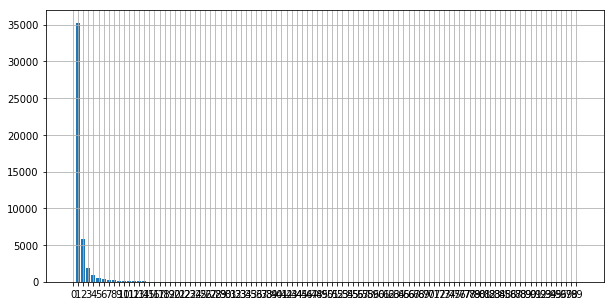

In [169]:
plt.figure(figsize=(10,5))
plt.bar(c,d[:100],align='center')
plt.xticks(c)
plt.grid(True,which='both')
plt.show()

In [170]:
dcent = nx.degree_centrality(G)

In [171]:
centrality = sorted(dcent.items(),reverse=True,key = itemgetter(1))

In [172]:
centrality[:100]

[('будет, V', 0.007135885478798395),
 ('был, V', 0.006745472291508513),
 ('было, V', 0.006528576076347468),
 ('были, V', 0.005313957271445614),
 ('может, V', 0.005140440299316777),
 ('была, V', 0.004728337490510791),
 ('анализ, S', 0.004164407331092072),
 ('время, S', 0.0038824422513827135),
 ('возможность, S', 0.0038173733868344),
 ('автор, S', 0.0033185120919639955),
 ('авторы, S', 0.003231753605899577),
 ('могут, V', 0.00310161587680295),
 ('спбгу, S', 0.0029280989046741135),
 ('анализа, S', 0.0028630300401257997),
 ('быть, V', 0.0028413404186096954),
 ('возможности, S', 0.0026461338249647542),
 ('является, V', 0.0024943064743520225),
 ('будут, V', 0.0024509272313198134),
 ('власти, S', 0.002429237609803709),
 ('времени, S', 0.0023207895022231864),
 ('вестник, S', 0.0019303763149333044),
 ('внимание, S', 0.0018653074503849909),
 ('войны, S', 0.0018219282073527816),
 ('государства, S', 0.0018002385858366771),
 ('деятельности, S', 0.0017568593428044681),
 ('все, S', 0.0016917904782561

In [177]:
def make_graph_by_tag(tag, df):
    
    first_word = []
    second_word = []
    first_tag = []
    second_tag = []
    pmi = []

    for i in range(len(df)):
        if (df['tag'][i].split()[0] in tag and df['tag'][i].split()[1] in tag) and not (len(df['ngram'][i].split()[0])==1 or len(df['ngram'][i].split()[1])==1):
            first_word.append(df['ngram'][i].split()[0])
            second_word.append(df['ngram'][i].split()[1])
            first_tag.append(df['tag'][i].split()[0])
            second_tag.append(df['tag'][i].split()[1])
            pmi.append('%.3f'%float(df['pmi'][i]))
    
    sequences = pd.DataFrame({'first_word':first_word
                         , 'second_word':second_word
                         , 'first_tag':first_tag
                         , 'second_tag':second_tag
                         , 'pmi':pmi})
    
    G = nx.Graph()
    
    for i in range(len(sequences)):
        first_node = '{0}, {1}'.format(sequences['first_word'][i], sequences['first_tag'][i])
        second_node = '{0}, {1}'.format(sequences['second_word'][i], sequences['second_tag'][i])
        if first_node in G.nodes() and not second_node in G.nodes():
            G.add_node(second_node)
            G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
        elif second_node in G.nodes() and not first_node in G.nodes():
            G.add_node(first_node)
            G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
        elif not first_node in G.nodes() and not second_node in G.nodes():
            G.add_node(first_node)
            G.add_node(second_node)
            G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
        else:
            pass
        
    return G

In [178]:
N = make_graph_by_tag('S', df)

In [179]:
V = make_graph_by_tag('V', df)

In [180]:
def draw_degree_hist(graph):
    d = nx.degree_histogram(graph)
    c = range(0,100,1)
    plt.figure(figsize=(10,5))
    plt.bar(c,d[:100],align='center')
    plt.xticks(c)
    plt.grid(True,which='both')
    plt.show()

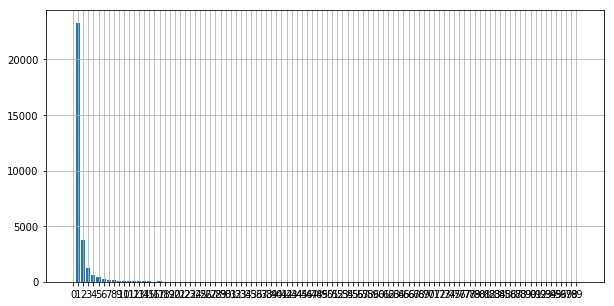

In [181]:
draw_degree_hist(N)

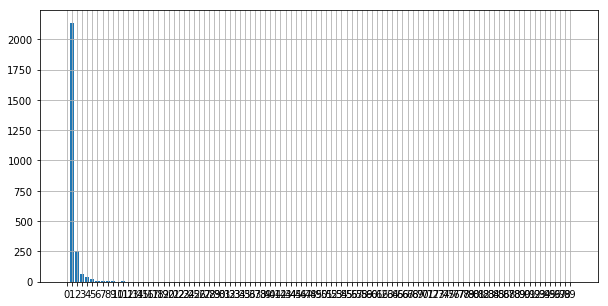

In [182]:
draw_degree_hist(V)

In [193]:
def get_most_common(graph):
    degrees = sorted(nx.degree(graph),reverse=True,key=itemgetter(1))
    print(degrees[:100])

In [194]:
get_most_common(N)

[('анализ, S', 165), ('спбгу, S', 145), ('анализа, S', 113), ('время, S', 101), ('времени, S', 100), ('вестник, S', 95), ('власти, S', 87), ('деятельности, S', 87), ('государства, S', 73), ('возможность, S', 67), ('войны, S', 65), ('россии, S', 63), ('жизни, S', 63), ('это, S', 62), ('истории, S', 61), ('александр, S', 58), ('внимание, S', 55), ('модели, S', 53), ('банка, S', 53), ('населения, S', 52), ('исследования, S', 52), ('автора, S', 51), ('активов, S', 50), ('возможности, S', 50), ('данных, S', 48), ('акций, S', 47), ('сша, S', 46), ('взаимодействия, S', 46), ('зрения, S', 46), ('все, S', 45), ('города, S', 44), ('работе, S', 44), ('автор, S', 43), ('влияния, S', 43), ('безопасности, S', 43), ('группы, S', 42), ('влияние, S', 42), ('информации, S', 40), ('активности, S', 40), ('государств, S', 40), ('мира, S', 39), ('личности, S', 38), ('типа, S', 38), ('общества, S', 38), ('место, S', 37), ('действий, S', 36), ('большинство, S', 36), ('количество, S', 35), ('банков, S', 35), (

In [195]:
get_most_common(V)

[('будет, V', 219), ('может, V', 198), ('могут, V', 165), ('было, V', 90), ('будут, V', 85), ('будем, V', 48), ('быть, V', 46), ('позволяет, V', 45), ('был, V', 44), ('были, V', 44), ('мог, V', 37), ('могли, V', 32), ('можем, V', 31), ('следует, V', 29), ('была, V', 23), ('начинает, V', 21), ('могла, V', 18), ('стали, V', 18), ('могло, V', 17), ('позволяют, V', 15), ('стала, V', 14), ('начинают, V', 13), ('исходя, V', 12), ('позволило, V', 12), ('желая, V', 11), ('начал, V', 11), ('начали, V', 11), ('стал, V', 11), ('удалось, V', 11), ('пытается, V', 10), ('смогли, V', 10), ('буду, V', 9), ('позволит, V', 9), ('продолжает, V', 9), ('хочет, V', 9), ('заставляет, V', 8), ('стоит, V', 8), ('приходится, V', 8), ('взять, V', 7), ('вести, V', 7), ('работать, V', 7), ('жить, V', 7), ('начиная, V', 7), ('начала, V', 7), ('предстоит, V', 7), ('решил, V', 7), ('делать, V', 6), ('знать, V', 6), ('понять, V', 6), ('сказать, V', 6), ('найти, V', 6), ('выявить, V', 6), ('сможет, V', 6), ('стремится,